In [8]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model.n_neighbors

5

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.effective_metric_

'euclidean'

In [8]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [10]:
RMSE = [] 
#for train
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , " RMSE: ", rmse)

k = 1  RMSE:  0.0
k = 2  RMSE:  179.52761335480352
k = 3  RMSE:  205.20157172291863
k = 4  RMSE:  220.5139794876305
k = 5  RMSE:  239.6467132541376
k = 6  RMSE:  243.5904190007242
k = 7  RMSE:  258.1478781634636
k = 8  RMSE:  266.05374203349805
k = 9  RMSE:  269.73782093553376
k = 10  RMSE:  271.2798300436963


In [11]:
RMSE = [] 
#for test
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , " RMSE: ", rmse)

k = 1  RMSE:  455.03925390751965
k = 2  RMSE:  415.99629571490965
k = 3  RMSE:  420.6765370082348
k = 4  RMSE:  428.8564674588792
k = 5  RMSE:  426.6570764525201
k = 6  RMSE:  423.5071669008732
k = 7  RMSE:  414.9361222421057
k = 8  RMSE:  413.7094731463598
k = 9  RMSE:  417.84419990871265
k = 10  RMSE:  421.6252180741266


In [12]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)
knn_cv_model.best_params_["n_neighbors"]

8

In [13]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "RMSE: ", rmse, "RMSE_CV: ", rmse_cv )


k = 1 RMSE:  0.0 RMSE_CV:  325.3947514706382
k = 2 RMSE:  179.52761335480352 RMSE_CV:  293.24000183333817
k = 3 RMSE:  205.20157172291863 RMSE_CV:  283.7486667487823
k = 4 RMSE:  220.5139794876305 RMSE_CV:  286.3240222024089
k = 5 RMSE:  239.6467132541376 RMSE_CV:  290.0705466132226
k = 6 RMSE:  243.5904190007242 RMSE_CV:  298.1263115575851
k = 7 RMSE:  258.1478781634636 RMSE_CV:  294.77070479194987
k = 8 RMSE:  266.05374203349805 RMSE_CV:  291.98672028891235
k = 9 RMSE:  269.73782093553376 RMSE_CV:  295.7162739573105
k = 10 RMSE:  271.2798300436963 RMSE_CV:  301.31047022701154


In [29]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [30]:
from sklearn.svm import SVR
svr_model = SVR("linear").fit(X_train, y_train)

svr_model.predict(X_train)[0:5]

print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [31]:
y_pred = svr_model.predict(X_train)

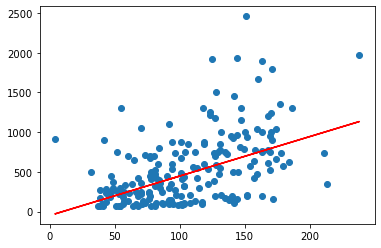

In [32]:
plt.scatter(X_train, y_train);
plt.plot(X_train,y_pred, color = "r");

In [21]:
svr_model.predict([[91]])


array([403.52804878])

In [22]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [23]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [26]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [25]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

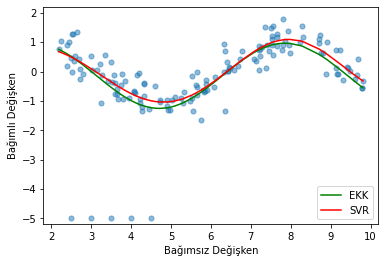

In [33]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]


from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [37]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [38]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

In [39]:
svr_rbf

SVR()

In [40]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [41]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [42]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

In [43]:
y_pred = svr_tuned.predict(X_train)

np.sqrt(mean_squared_error(y_train, y_pred))

323.54591099068784

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
mlp_model
mlp_model.n_layers_
mlp_model.hidden_layer_sizes

(100, 20)

In [9]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(100, 20))


475.8047014685692

In [11]:
mlp_model = MLPRegressor(hidden_layer_sizes = (20,100)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(20, 100))


430.22949737464126

In [12]:
mlp_model = MLPRegressor(hidden_layer_sizes = (20,20)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(20, 20))


617.265023658605

In [13]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)
print(mlp_model)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

MLPRegressor(hidden_layer_sizes=(100, 100))


356.6983035726574

In [15]:
mlp_model
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [19]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [20]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

362.26396895855567

In [21]:
y_pred = mlp_tuned.predict(X_train_scaled)
np.sqrt(mean_squared_error(y_train, y_pred))

294.67945813288406

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [10]:
cart_model = DecisionTreeRegressor(min_samples_split = 2).fit(X_train, y_train)

In [11]:
print(cart_model)
cart_model

DecisionTreeRegressor()


DecisionTreeRegressor()

In [12]:
X_train

,Hits
183,91.0
229,144.0
286,152.0
102,49.0
153,95.0
...,...
24,168.0
236,52.0
93,138.0
137,103.0


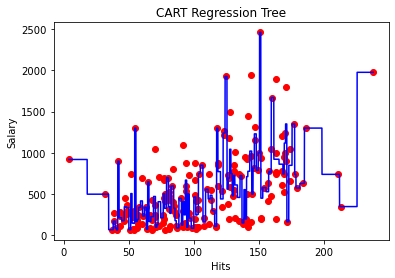

In [13]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART Regression Tree')  
plt.xlabel('Hits') 
plt.ylabel('Salary') ;

In [14]:
!pip install skompiler


  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54287 sha256=a1209c091f596bb47146b69b560f6d4fe1ceabd5a2532c3028d12bf1311c5cce
  Stored in directory: c:\users\emrehan\appdata\local\pip\cache\wheels\fd\94\33\2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler


In [15]:
from skompiler import skompile

In [18]:
print(skompile(cart_model.predict))

(if (x[0] <= 117.5) then (if (x[0] <= 18.0) then 920.0 else (if (x[0] <= 76.5) then (if (x[0] <= 41.5) then (if (x[0] <= 34.5) then 500.0 else (if (x[0] <= 39.5) then (if (x[0] <= 38.0) then 70.0 else 175.0) else (if (x[0] <= 40.5) then 90.0 else 67.5))) else (if (x[0] <= 42.5) then 900.0 else (if (x[0] <= 54.5) then (if (x[0] <= 52.5) then (if (x[0] <= 51.5) then (if (x[0] <= 50.0) then (if (x[0] <= 46.5) then (if (x[0] <= 44.5) then 215.55566666666664 else 180.0) else (if (x[0] <= 48.0) then 347.5 else 337.5)) else 70.0) else 507.5) else (if (x[0] <= 53.5) then 150.0 else 146.83333333333334)) else (if (x[0] <= 55.5) then 1300.0 else (if (x[0] <= 57.5) then (if (x[0] <= 56.5) then 170.0 else 193.75) else (if (x[0] <= 70.5) then (if (x[0] <= 69.0) then (if (x[0] <= 65.5) then (if (x[0] <= 64.5) then (if (x[0] <= 63.5) then (if (x[0] <= 60.5) then (if (x[0] <= 59.0) then 340.0 else 418.5) else (if (x[0] <= 62.0) then 235.0 else 341.667)) else 75.0) else 650.0) else (if (x[0] <= 67.0) th

In [19]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [20]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [21]:
x=[91]

In [25]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [26]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [27]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

In [28]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

In [29]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [30]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [31]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=248961214),
 DecisionTreeRegressor(random_state=1207807503),
 DecisionTreeRegressor(random_state=918817496),
 DecisionTreeRegressor(random_state=503546203),
 DecisionTreeRegressor(random_state=1527567866),
 DecisionTreeRegressor(random_state=1322960211),
 DecisionTreeRegressor(random_state=740699455),
 DecisionTreeRegressor(random_state=221618313),
 DecisionTreeRegressor(random_state=1033969229),
 DecisionTreeRegressor(random_state=1492674929)]

In [33]:
bag_model.estimators_features_

[array([ 6, 10, 18, 13, 15, 18,  9, 10,  4,  9,  6,  6, 12,  4, 18, 17, 17,
        12, 11]),
 array([15,  4, 14, 15,  3,  8,  9,  6, 18, 13,  4,  1, 18, 12, 10,  9, 11,
        14,  5]),
 array([ 3,  8,  6, 14, 16, 14,  7, 12, 18,  0,  0, 17,  7, 13,  6,  1,  8,
        17, 17]),
 array([14,  1, 17,  5, 16, 11, 14, 11, 16,  6, 11, 13,  4, 15, 18, 16,  4,
        13,  7]),
 array([11,  2, 17, 11, 11, 13,  6, 18, 10,  8, 16,  2,  2, 13,  2, 14,  5,
         4,  0]),
 array([11,  4, 11, 18,  6, 13, 18, 11,  8,  7, 13,  2, 13,  4,  8,  6,  5,
         7, 14]),
 array([14, 13, 10, 12, 13, 10, 12,  9, 13, 17, 18, 13,  7,  5, 16,  9,  8,
         3, 13]),
 array([ 9,  1,  1, 16,  7,  7, 12, 14, 16,  6, 11, 18,  9, 18, 11,  8,  7,
        12, 17]),
 array([13,  6,  8, 16, 10,  7, 13, 11,  6, 10,  3,  2, 13, 10,  6, 11, 14,
         4,  8]),
 array([17, 18,  7,  0,  2,  4, 17, 17, 16,  4, 14,  7,  0,  9,  7,  7, 18,
        14,  3])]

In [34]:

y_pred = bag_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

308.22517791251033

In [37]:
y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

435.5503471086722

In [38]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)
bag_params = {"n_estimators": range(2,20)}
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)
bag_cv_model.fit(X_train, y_train)
bag_cv_model.best_params_

{'n_estimators': 9}

In [39]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)
bag_tuned.fit(X_train, y_train)
y_pred = bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.457987188104

In [40]:
bag_tuned = BaggingRegressor( n_estimators = 9, random_state = 45)
bag_tuned.fit(X_train, y_train)
y_pred = bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.99375978078

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [44]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [49]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
#rf_cv_model.fit(X_train, y_train)
#rf_cv_model.best_params_

In [46]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [47]:
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

339.00715782186006

In [50]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Level of Importance')

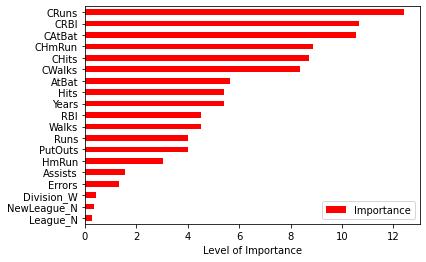

In [53]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Level of Importance")

In [54]:
Importance

,Importance
AtBat,5.638937
Hits,5.426913
HmRun,3.025407
Runs,4.018719
RBI,4.507660
Walks,4.503751
Years,5.399884
CAtBat,10.546622
CHits,8.730545
CHmRun,8.852506


In [55]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [56]:
!pip install xgboost

In [57]:
import xgboost as xgb

In [58]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [61]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

In [68]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [67]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.6924342393753

In [69]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

Text(0.5, 0, 'Level of Importance')

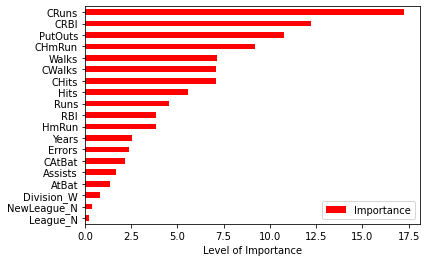

In [71]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Level of Importance")

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
import xgboost as xgb

In [4]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)
from xgboost import XGBRegressor
xgb_model = XGBRegressor().fit(X_train, y_train)

In [5]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

In [6]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [7]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)
xgb_cv.best_params_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [10]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.4180975078934

In [11]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275204366939

In [12]:
!pip install lightgbm

In [13]:
from lightgbm import LGBMRegressor

In [14]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [15]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [16]:
lgbm_model

LGBMRegressor()

In [17]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)
lgbm_cv_model.fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [18]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

In [19]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

In [20]:
!pip install catboost

In [21]:
from catboost import CatBoostRegressor

In [22]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 136ms	remaining: 2m 16s
1:	learn: 431.3923642	total: 139ms	remaining: 1m 9s
2:	learn: 424.8820360	total: 140ms	remaining: 46.7s
3:	learn: 418.2514904	total: 142ms	remaining: 35.3s
4:	learn: 412.6394021	total: 144ms	remaining: 28.6s
5:	learn: 406.6247020	total: 146ms	remaining: 24.1s
6:	learn: 400.5321206	total: 148ms	remaining: 21s
7:	learn: 394.6683437	total: 150ms	remaining: 18.6s
8:	learn: 388.2496484	total: 152ms	remaining: 16.8s
9:	learn: 382.9448842	total: 155ms	remaining: 15.3s
10:	learn: 377.2600080	total: 157ms	remaining: 14.1s
11:	learn: 372.4829606	total: 159ms	remaining: 13.1s
12:	learn: 366.6823437	total: 161ms	remaining: 12.2s
13:	learn: 362.6076230	total: 162ms	remaining: 11.4s
14:	learn: 358.0107745	total: 164ms	remaining: 10.8s
15:	learn: 353.2802665	total: 166ms	remaining: 10.2s
16:	learn: 348.5646265	total: 169ms	remaining: 9.76s
17:	learn: 343.6407912	total: 171ms	remaining: 9.32s
18:	learn: 339.2363847	tota

In [23]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

In [26]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [27]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [28]:
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 1.59ms	remaining: 1.59s
1:	learn: 404.1864276	total: 3.19ms	remaining: 1.59s
2:	learn: 386.3231718	total: 4.67ms	remaining: 1.55s
3:	learn: 370.5548032	total: 6.75ms	remaining: 1.68s
4:	learn: 354.9242038	total: 8.17ms	remaining: 1.63s
5:	learn: 342.3403984	total: 9.52ms	remaining: 1.58s
6:	learn: 328.2370070	total: 10.8ms	remaining: 1.53s
7:	learn: 317.5056526	total: 12.1ms	remaining: 1.5s
8:	learn: 306.6243511	total: 13.4ms	remaining: 1.47s
9:	learn: 297.3147023	total: 14.6ms	remaining: 1.44s
10:	learn: 288.3685892	total: 15.8ms	remaining: 1.42s
11:	learn: 281.0996220	total: 17ms	remaining: 1.4s
12:	learn: 273.2254898	total: 18.1ms	remaining: 1.38s
13:	learn: 266.9003385	total: 19.3ms	remaining: 1.36s
14:	learn: 261.9092500	total: 20.7ms	remaining: 1.36s
15:	learn: 256.2637350	total: 22ms	remaining: 1.35s
16:	learn: 250.3667935	total: 23.3ms	remaining: 1.35s
17:	learn: 244.8631098	total: 24.7ms

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [29]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))






0:	learn: 442.4903140	total: 7.02ms	remaining: 1.4s
1:	learn: 440.4621805	total: 11.7ms	remaining: 1.16s
2:	learn: 438.5132091	total: 16.4ms	remaining: 1.07s
3:	learn: 436.2180377	total: 21.2ms	remaining: 1.04s
4:	learn: 434.0461579	total: 25.1ms	remaining: 980ms
5:	learn: 431.8437770	total: 29.1ms	remaining: 941ms
6:	learn: 430.1594587	total: 33.1ms	remaining: 913ms
7:	learn: 428.0941830	total: 37.3ms	remaining: 896ms
8:	learn: 426.0998774	total: 41.8ms	remaining: 888ms
9:	learn: 424.0249067	total: 43ms	remaining: 817ms
10:	learn: 422.1921868	total: 47.2ms	remaining: 811ms
11:	learn: 420.2506764	total: 51.5ms	remaining: 807ms
12:	learn: 418.3116383	total: 55.6ms	remaining: 800ms
13:	learn: 416.2966847	total: 59.7ms	remaining: 793ms
14:	learn: 414.5776175	total: 63.8ms	remaining: 787ms
15:	learn: 412.8009394	total: 68.2ms	remaining: 784ms
16:	learn: 410.9774146	total: 72.1ms	remaining: 776ms
17:	learn: 409.1047417	total: 76.2ms	remaining: 770ms
18:	learn: 407.6243957	total: 80.1ms	rema

369.6970696250705

In [30]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.1, 
                               depth = 5)

catb_tuned = catb_tuned.fit(X_train,y_train)
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0:	learn: 422.4143448	total: 1.26ms	remaining: 1.25s
1:	learn: 404.1864276	total: 2.37ms	remaining: 1.18s
2:	learn: 386.3231718	total: 3.32ms	remaining: 1.1s
3:	learn: 370.5548032	total: 4.35ms	remaining: 1.08s
4:	learn: 354.9242038	total: 5.43ms	remaining: 1.08s
5:	learn: 342.3403984	total: 6.71ms	remaining: 1.11s
6:	learn: 328.2370070	total: 7.99ms	remaining: 1.13s
7:	learn: 317.5056526	total: 9.17ms	remaining: 1.14s
8:	learn: 306.6243511	total: 10.5ms	remaining: 1.16s
9:	learn: 297.3147023	total: 11.6ms	remaining: 1.14s
10:	learn: 288.3685892	total: 12.6ms	remaining: 1.13s
11:	learn: 281.0996220	total: 13.7ms	remaining: 1.13s
12:	learn: 273.2254898	total: 14.8ms	remaining: 1.12s
13:	learn: 266.9003385	total: 15.8ms	remaining: 1.11s
14:	learn: 261.9092500	total: 16.7ms	remaining: 1.1s
15:	learn: 256.2637350	total: 17.7ms	remaining: 1.09s
16:	learn: 250.3667935	total: 18.6ms	remaining: 1.08s
17:	learn: 244.8631098	total: 19.7ms	remaining: 1.07s
18:	learn: 240.1540669	total: 20.6ms	rem

356.665762904938